In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from numba import jit

import sys
sys.path.append('..')
from lib import *
from lib.maxent import *
plt.style.use('../peptidome.mplstyle')

In [30]:
proteome = 'Humannozf'
models = ['ncov', 'nskewfcov']
k = 9

coincidence_probs = {}

for model in models:
    energy = make_energy(np.load('../maxent/data/{proteome}_{model}_k{k}_params.npz'.format(
        proteome=proteome, model=model, k=k)))
    F = np.float(pd.read_csv('../maxent/data/{proteome}_{model}_k{k}_entropy.csv'.format(
        proteome=proteome, model=model, k=k),
                            header=None, index_col=0).loc['F'])
    loglikelihood  = lambda seq: -energy(seq) + F
    matrix = load_matrix('data/{proteome}_{model}_k{k}_matrix.csv.gz'.format(
        proteome=proteome, model=model, k=k))
    logp = np.array([loglikelihood(row) for row in matrix])
    coincidence_prob = np.mean(np.exp(logp))
    coincidence_probs[model] = coincidence_prob
    print(model, coincidence_prob)

ncov 2.655769700480318e-11
nskewfcov 1.207872568521944e-08


In [28]:
'%e'%np.exp(-np.mean(logp)),'%e'%(1/np.mean(np.exp(logp)))

('1.641412e+11', '8.279019e+07')

In [29]:
np.mean(np.exp(logp)), 1/20**k

(1.207872568521944e-08, 1.953125e-12)

In [38]:
probs = [1/20**k, coincidence_probs['ncov'], coincidence_probs['nskewfcov']]
labels = ['uniform', '2nd moment', '3rd moment\n2-point']
s = pd.Series(probs, labels)

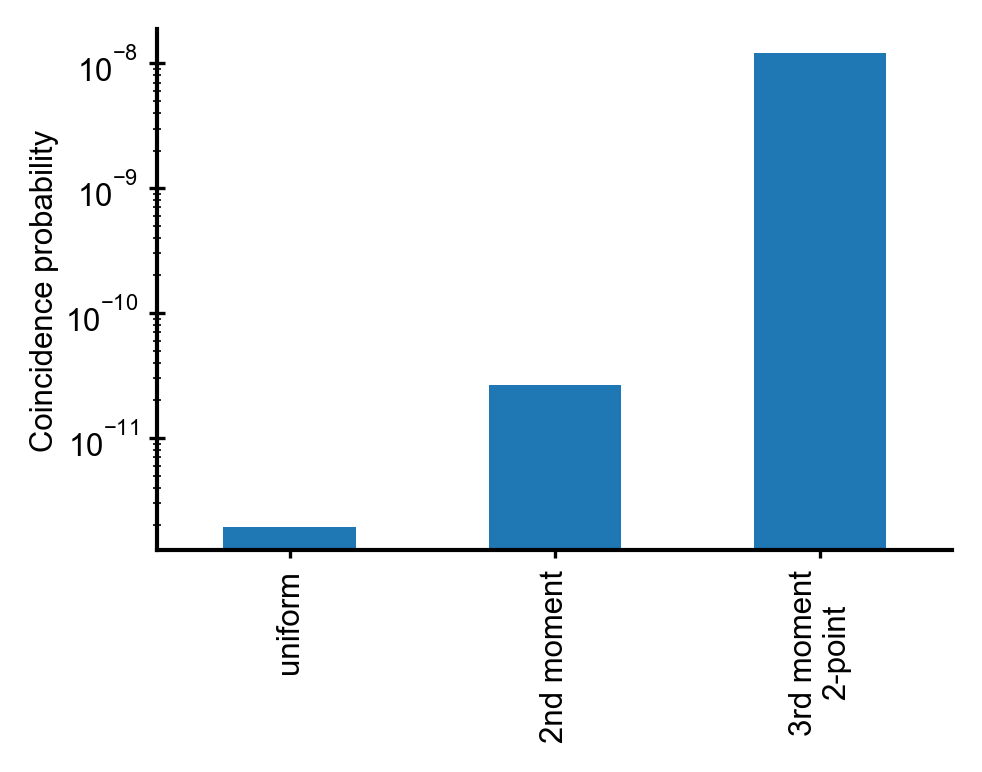

In [41]:
fig, ax = plt.subplots()
s.plot(kind='bar', log=True)
ax.set_ylabel('Coincidence probability')
fig.savefig('coincidence_prob.png')